In [ ]:
!nvidia-smi


Wed Mar 19 04:48:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
pip install torch torchvision numpy matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


Torch Version: 2.6.0+cu124
CUDA Available: True
GPU: Tesla T4


In [ ]:
!rm -rf /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive


import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Drive is already mounted!")

Drive is already mounted!


In [ ]:
data_path = "/content/drive/MyDrive/brain_mri_dataset"


In [ ]:
import os

data_path = "/content/drive/MyDrive/brain_mri_dataset/yes"


print("Number of images in 'yes':", len(os.listdir(data_path)))


Number of images in 'yes': 70


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
from PIL import Image




data_path = "/content/drive/MyDrive/brain_mri_dataset/yes"



image_folder_path = os.path.join(data_path, 'tumor')
os.makedirs(image_folder_path, exist_ok=True)



In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
from PIL import Image

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images for DC-GAN
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize [-1,1]
])


data_path = "/content/drive/MyDrive/brain_mri_dataset/yes"


image_folder_path = os.path.join(data_path, 'tumor')
os.makedirs(image_folder_path, exist_ok=True)


for filename in os.listdir(data_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')) and not os.path.isdir(os.path.join(data_path, filename)):
        source_path = os.path.join(data_path, filename)
        destination_path = os.path.join(image_folder_path, filename)
        os.rename(source_path, destination_path)


dataset = ImageFolder(root="/content/drive/MyDrive/brain_mri_dataset", transform=transform)


batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(f" Dataset Loaded! Total Images: {len(dataset)}")


 Dataset Loaded! Total Images: 253


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")


 Using device: cuda


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()  # Output range [-1,1]
        )

    def forward(self, x):
        return self.model(x)

# Initialize Generator
G = Generator().to(device)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize Discriminator
D = Discriminator().to(device)


In [ ]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Optimizers
lr = 0.0002
beta1 = 0.5  # Adam optimizer hyperparameter

optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))


In [ ]:
num_epochs = 60
fixed_noise = torch.randn(16, 100, 1, 1, device=device)

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):


        real_images = real_images.to(device)
        batch_size = real_images.size(0)


        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)


        optimizer_D.zero_grad()

        # Compute loss on real images
        real_outputs = D(real_images).view(-1, 1)
        loss_real = criterion(real_outputs, real_labels)

        # Generate fake images
        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_images = G(noise)

        # Compute loss on fake images
        fake_outputs = D(fake_images.detach()).view(-1, 1)
        loss_fake = criterion(fake_outputs, fake_labels)

        # Total discriminator loss
        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        #Train Generator
        optimizer_G.zero_grad()

        # Generate fake images again
        fake_outputs = D(fake_images).view(-1, 1)
        loss_G = criterion(fake_outputs, real_labels)

        loss_G.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss_D: {loss_D.item():.4f} | Loss_G: {loss_G.item():.4f}")

    # Save generated images every 10 epochs
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            fake_images = G(fixed_noise).detach().cpu()
        vutils.save_image(fake_images, f"epoch_{epoch+1}.png", normalize=True)

print(" Training Complete!")


Epoch [1/60] | Loss_D: 1.1941 | Loss_G: 10.9117
Epoch [2/60] | Loss_D: 0.0823 | Loss_G: 6.1982
Epoch [3/60] | Loss_D: 0.0868 | Loss_G: 7.2541
Epoch [4/60] | Loss_D: 0.1575 | Loss_G: 8.9767
Epoch [5/60] | Loss_D: 0.0420 | Loss_G: 5.5805
Epoch [6/60] | Loss_D: 0.2903 | Loss_G: 7.5628
Epoch [7/60] | Loss_D: 0.1192 | Loss_G: 8.4244
Epoch [8/60] | Loss_D: 0.2969 | Loss_G: 7.2564
Epoch [9/60] | Loss_D: 0.2095 | Loss_G: 5.4225
Epoch [10/60] | Loss_D: 3.3907 | Loss_G: 12.2587
Epoch [11/60] | Loss_D: 0.2172 | Loss_G: 5.8210
Epoch [12/60] | Loss_D: 0.1067 | Loss_G: 6.4464
Epoch [13/60] | Loss_D: 0.2921 | Loss_G: 6.0002
Epoch [14/60] | Loss_D: 0.2094 | Loss_G: 7.2769
Epoch [15/60] | Loss_D: 0.1050 | Loss_G: 3.9911
Epoch [16/60] | Loss_D: 0.2262 | Loss_G: 3.4986
Epoch [17/60] | Loss_D: 0.1911 | Loss_G: 4.7506
Epoch [18/60] | Loss_D: 0.0403 | Loss_G: 6.5241
Epoch [19/60] | Loss_D: 0.1969 | Loss_G: 6.3588
Epoch [20/60] | Loss_D: 0.0336 | Loss_G: 6.6483
Epoch [21/60] | Loss_D: 0.2755 | Loss_G: 8.7184

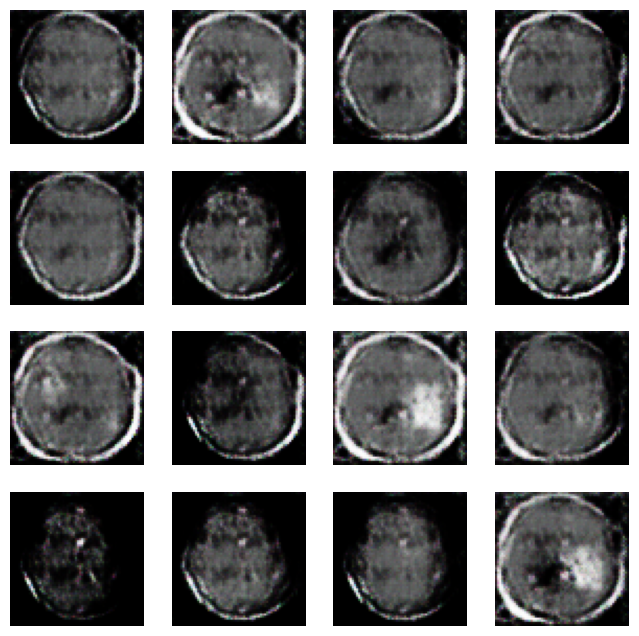

In [ ]:
# Generate images from random noise
with torch.no_grad():
    noise = torch.randn(16, 100, 1, 1, device=device)
    fake_images = G(noise).detach().cpu()


def show_generated_images(images):
    images = images * 0.5 + 0.5
    images = images.numpy().transpose(0, 2, 3, 1)
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis("off")

    plt.show()

show_generated_images(fake_images)


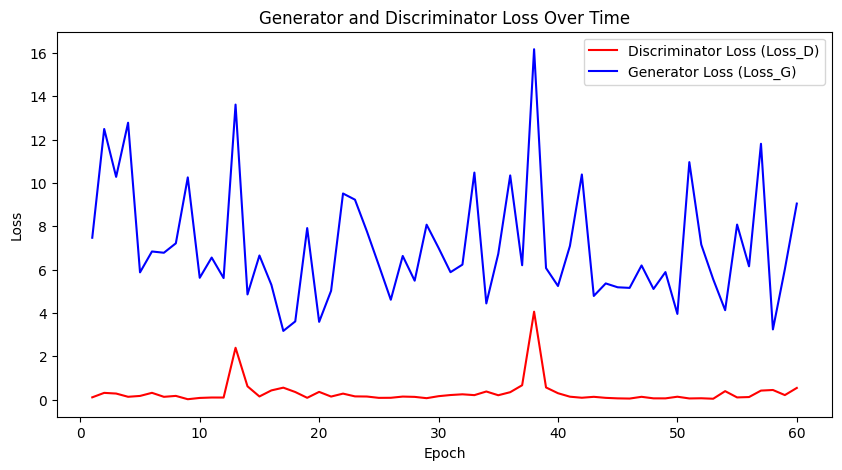

In [ ]:
import matplotlib.pyplot as plt

# Loss values from your logs
epochs = list(range(1, 61))
loss_D = [0.1059, 0.3122, 0.2808, 0.1312, 0.1706, 0.3142, 0.1295, 0.1723, 0.0188, 0.0784,
          0.0976, 0.0961, 2.3934, 0.6144, 0.1463, 0.4257, 0.5525, 0.3514, 0.0838, 0.3578,
          0.1416, 0.2776, 0.1499, 0.1433, 0.0816, 0.0851, 0.1408, 0.1271, 0.0669, 0.1589,
          0.2122, 0.2457, 0.2076, 0.3756, 0.2026, 0.3433, 0.6646, 4.0590, 0.5625, 0.2961,
          0.1355, 0.0870, 0.1296, 0.0821, 0.0583, 0.0494, 0.1300, 0.0591, 0.0582, 0.1343,
          0.0545, 0.0632, 0.0412, 0.3914, 0.1021, 0.1192, 0.4172, 0.4449, 0.2097, 0.5397]

loss_G = [7.4731, 12.4941, 10.2826, 12.7817, 5.8743, 6.8387, 6.7799, 7.2159, 10.2582, 5.6239,
          6.5581, 5.6112, 13.6193, 4.8553, 6.6537, 5.3000, 3.1718, 3.6112, 7.9183, 3.5901,
          5.0225, 9.5153, 9.2301, 7.7666, 6.2006, 4.6112, 6.6320, 5.4905, 8.0755, 7.0048,
          5.8828, 6.2319, 10.4807, 4.4418, 6.7306, 10.3491, 6.2035, 16.1750, 6.0719, 5.2452,
          7.0921, 10.3927, 4.7856, 5.3639, 5.1858, 5.1584, 6.1938, 5.1089, 5.8875, 3.9554,
          10.9630, 7.1564, 5.5560, 4.1291, 8.0813, 6.1534, 11.8105, 3.2415, 6.0224, 9.0499]

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_D, label="Discriminator Loss (Loss_D)", color="red")
plt.plot(epochs, loss_G, label="Generator Loss (Loss_G)", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Over Time")
plt.legend()
plt.show()
